In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [36]:
# data = pd.read_csv('./datasets/z_train.csv')
data = pd.read_csv('./datasets/z_test.csv')
data.head(15)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,23603,city_160,0.920,Male,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,1,78
1,22499,city_45,0.890,NaN,Has relevent experience,Full time course,High School,NaN,6,50-99,Pvt Ltd,1,36
2,10465,city_149,0.689,Male,No relevent experience,no_enrollment,Graduate,STEM,5,NaN,NaN,never,34
3,8293,city_67,0.855,Female,Has relevent experience,no_enrollment,Masters,STEM,9,1000-4999,Pvt Ltd,1,149
4,4246,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,16,50-99,Funded Startup,2,7
5,29306,city_159,0.843,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,NaN,2,14
6,23118,city_128,0.527,Male,No relevent experience,Full time course,High School,NaN,<1,NaN,NaN,never,2
7,32832,city_114,0.926,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,Pvt Ltd,1,21
8,13380,city_136,0.897,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10/49,Pvt Ltd,1,21
9,16102,city_11,0.550,NaN,Has relevent experience,Full time course,Graduate,STEM,3,NaN,NaN,1,41


# Analysis

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3832 entries, 0 to 3831
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             3832 non-null   int64  
 1   city                    3832 non-null   object 
 2   city_development_index  3832 non-null   float64
 3   gender                  2925 non-null   object 
 4   relevent_experience     3832 non-null   object 
 5   enrolled_university     3748 non-null   object 
 6   education_level         3741 non-null   object 
 7   major_discipline        3256 non-null   object 
 8   experience              3817 non-null   object 
 9   company_size            2628 non-null   object 
 10  company_type            2583 non-null   object 
 11  last_new_job            3748 non-null   object 
 12  training_hours          3832 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 389.3+ KB


In [38]:
data.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                     907
relevent_experience          0
enrolled_university         84
education_level             91
major_discipline           576
experience                  15
company_size              1204
company_type              1249
last_new_job                84
training_hours               0
dtype: int64

In [39]:
data.dropna(inplace=True)

In [40]:
data.shape

(1773, 13)

# Transformaciones

In [42]:
df1 = data.copy()

In [43]:
df1.gender.value_counts()

Male      1600
Female     159
Other       14
Name: gender, dtype: int64

In [44]:
df1.gender.isna().sum()

0

In [45]:
df1.dropna(subset=['gender'], inplace=True)
df1.shape

(1773, 13)

In [46]:
df1.drop(df1[df1.gender=='Other'].index, inplace=True)
df1.shape

(1759, 13)

In [47]:
df1.gender.head()

3     Female
4       Male
7       Male
8       Male
10      Male
Name: gender, dtype: object

In [48]:
# Transforming enrolled_university
df1.enrolled_university = df1.enrolled_university.fillna('no_enrollment')
df1.enrolled_university.isna().sum()

0

In [49]:
# Transforming educational level
df1.education_level = df1.education_level.fillna('undefinded')
df1.education_level.isna().sum()

0

In [50]:
# Transformación last_new_job
df1.last_new_job = df1.last_new_job.fillna('undefinded')
df1.last_new_job.isna().sum()

0

## Experience

In [51]:
df1.experience.value_counts()

>20    364
5      115
10     110
6      103
9      103
4       94
8       89
7       85
3       83
12      76
15      75
11      68
16      59
2       58
13      55
14      55
17      40
18      35
19      33
1       21
<1      20
20      18
Name: experience, dtype: int64

In [52]:
df1.dropna(subset=['experience'], inplace=True)
df1.shape

(1759, 13)

In [53]:
df1.shape

(1759, 13)

In [54]:
df1.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours'],
      dtype='object')

In [56]:
# creamos un dataset con variables relevantes para medir la situación del empleado
#  df2 = df1[['enrollee_id','gender','city_development_index','relevent_experience','enrolled_university','education_level','last_new_job','training_hours','target']]
df2 = df1[['enrollee_id','gender','city_development_index','relevent_experience','enrolled_university','education_level','last_new_job','training_hours']]
df2.head()

,enrollee_id,gender,city_development_index,relevent_experience,enrolled_university,education_level,last_new_job,training_hours
3,8293,Female,0.855,Has relevent experience,no_enrollment,Masters,1,149
4,4246,Male,0.920,Has relevent experience,no_enrollment,Graduate,2,7
7,32832,Male,0.926,Has relevent experience,Full time course,Graduate,1,21
8,13380,Male,0.897,Has relevent experience,no_enrollment,Graduate,1,21
10,21761,Male,0.920,No relevent experience,no_enrollment,Graduate,1,73


In [57]:
# Your comment here
def scatter_plot(df, col1, col2, col3=None):
    sns.set_theme()
    fig, ax = plt.subplots(figsize=(10,5))
    ax.set_title(col1 +' vs '+ col2)
    sns.scatterplot(ax=ax, data=df, x=col1, y=col2, hue=col3, palette="deep")
    plt.show();

In [58]:
# función para generar heatmap del df pasado como argumento
def heat_map(df):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(15,5))
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(ax=ax, data=corr, annot=True, cmap='Pastel1_r', mask=mask)
    plt.show()

In [59]:
df2.describe()

,enrollee_id,city_development_index,training_hours
count,1759.000000,1759.000000,1759.000000
mean,17012.198408,0.842695,65.491757
std,9960.991134,0.118440,61.224719
min,10.000000,0.479000,2.000000
25%,8364.000000,0.776000,23.000000
50%,17159.000000,0.910000,46.000000
75%,25872.000000,0.920000,86.000000
max,33362.000000,0.949000,336.000000


In [60]:
df2.isnull().sum()

enrollee_id               0
gender                    0
city_development_index    0
relevent_experience       0
enrolled_university       0
education_level           0
last_new_job              0
training_hours            0
dtype: int64

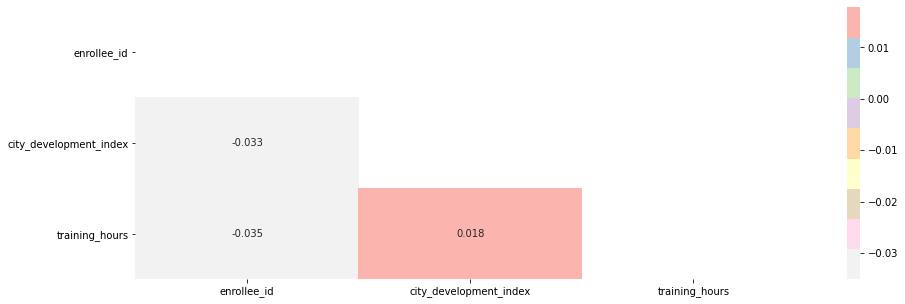

In [61]:
heat_map(df2)

In [62]:
df2.columns

Index(['enrollee_id', 'gender', 'city_development_index',
       'relevent_experience', 'enrolled_university', 'education_level',
       'last_new_job', 'training_hours'],
      dtype='object')

In [63]:
df_dummy = pd.get_dummies(data=df2, columns=['gender','relevent_experience','enrolled_university','education_level','last_new_job'])
df_dummy.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1759 entries, 3 to 3831
Data columns (total 19 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   enrollee_id                                  1759 non-null   int64  
 1   city_development_index                       1759 non-null   float64
 2   training_hours                               1759 non-null   int64  
 3   gender_Female                                1759 non-null   uint8  
 4   gender_Male                                  1759 non-null   uint8  
 5   relevent_experience_Has relevent experience  1759 non-null   uint8  
 6   relevent_experience_No relevent experience   1759 non-null   uint8  
 7   enrolled_university_Full time course         1759 non-null   uint8  
 8   enrolled_university_Part time course         1759 non-null   uint8  
 9   enrolled_university_no_enrollment            1759 non-null   uint8  
 10  

In [29]:
# Escalamos el dataset
from sklearn.preprocessing import StandardScaler
df_scaled = StandardScaler().fit_transform(df_dummy.drop(['enrollee_id','target'], axis=1))
df_scaled

array([[-0.59168531, -0.30076898, -0.31566545, ..., -0.26740202,
         1.88599529, -0.21338853],
       [-0.71249228, -0.7837542 , -0.31566545, ..., -0.26740202,
         1.88599529, -0.21338853],
       [ 0.65090075, -0.31742364, -0.31566545, ..., -0.26740202,
        -0.53022402, -0.21338853],
       ...,
       [ 0.65090075, -0.70048088,  3.16791081, ..., -0.26740202,
        -0.53022402, -0.21338853],
       [ 0.65090075, -0.66717156,  3.16791081, ..., -0.26740202,
        -0.53022402, -0.21338853],
       [ 0.65090075, -0.35073297, -0.31566545, ...,  3.73968757,
        -0.53022402, -0.21338853]])

In [67]:
# Generamos los datasets a entrenar
X = df_dummy.drop(['enrollee_id','target'], axis=1).to_numpy()
y = df_dummy.target.to_numpy()

In [31]:
# generamos los sets de datos de entreamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Modelo de Regresión Logistica

In [32]:
# Logististic Regression con el set completo de datos
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(X, y)
logreg.score(X, y)

0.8427929193593706

In [33]:
# Logististic Regression con el set de entrenamiento
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)
logreg.score(X_train, y_train)

0.8440463645943098

In [35]:
# Hacemos las predicciones
from sklearn.metrics import confusion_matrix
y_test_pred = logreg.predict(X_test)
confusion_matrix(y_test, y_test_pred)

array([[1134,   33],
       [ 204,   53]], dtype=int64)

In [72]:
# Hacemos las predicciones con el dataset para submission
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X, y_train)
y_pred = logreg.predict(X, y_train)
# confusion_matrix(y_test, y_test_pred)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.